# Import Libraries

In [1]:
import requests
import pandas as pd # Import Pandas
import panel as pn # Import Panel
import plotly.graph_objects as go
import plotly.express as px # Import Plotly
from plotly.subplots import make_subplots
pn.extension("plotly")# Import Plotly Extension
import matplotlib.pyplot as plt
from pprint import pprint
from datetime import datetime, timedelta # Datetime Feature
import numpy as np

# COINMETRICS API
import coinmetrics # Coinmetrics API
cm = coinmetrics.Community()

# API & Dataframe #1 (For RSI, Bollinger Band, SKDJ, etc.)

In [2]:
# API INPUTS
asset = "btc"
begin_timestamp = (datetime.now() - timedelta(days=90)).date()
end_timestamp = (datetime.now() - timedelta(days=0)).date()
# end_timestamp = datetime.now().date()


# API OUTPUT
# asset_data = requests.get(f"https://community-api.coinmetrics.io/v4/timeseries/market-candles?start_time={begin_timestamp}&paging_from=start&markets=coinbase-{asset}-usd-spot&pretty=true").json()
asset_data = requests.get(f"https://community-api.coinmetrics.io/v4/timeseries/market-candles?start_time={begin_timestamp}&end_time={end_timestamp}&paging_from=start&markets=coinbase-{asset}-usd-spot&pretty=true").json()



In [3]:
# Initiate clean dictionary
data_dictionary = {
    "date" : [],
    "open" : [],
    "close" : [],
    "high" : [],
    "low" : [],
    "volume" : [],
    "vwap" : [], 
}

# Use For Loop to interate through data into dictionary
for entry in asset_data['data']:
    data_dictionary['date'].append(entry['time'])
    data_dictionary['open'].append(float(entry['price_open']))
    data_dictionary['close'].append(float(entry['price_close']))
    data_dictionary['high'].append(float(entry['price_high']))
    data_dictionary['low'].append(float(entry['price_low']))
    data_dictionary['volume'].append(float(entry['volume']))
    data_dictionary['vwap'].append(float(entry['vwap']))

asset_data_df = pd.DataFrame.from_dict(data_dictionary)
pd.options.display.float_format = "{:,.2f}".format

asset_data_df.tail()

date      open     close      high       low  \
86  2021-11-14T00:00:00.000000000Z 64,400.01 65,505.02 65,525.00 63,596.90   
87  2021-11-15T00:00:00.000000000Z 65,505.03 63,624.59 66,339.90 63,371.00   
88  2021-11-16T00:00:00.000000000Z 63,621.05 60,107.98 63,624.60 58,638.00   
89  2021-11-17T00:00:00.000000000Z 60,088.65 60,351.51 60,824.38 58,380.00   
90  2021-11-18T00:00:00.000000000Z 60,351.51 56,898.00 60,977.21 56,514.13   

      volume      vwap  
86  6,081.57 64,515.20  
87 10,426.56 64,753.40  
88 24,910.15 60,821.42  
89 20,907.45 59,824.24  
90 26,749.21 58,560.83

# API & Dataframe #2 (For Puell Multiple)

In [4]:
#INPUTS
asset = "btc"
metric = "PriceUSD"
begin_timestamp = "2014-04-15"  # Format = "####-##-##"   The `datetime` type is also accepted
end_timestamp = "2021-11-15"  # The `datetime` type is also accepted

#OUTPUT (data for puell multiple)
asset_data_pm = cm.get_asset_data_for_time_range(asset, metric, begin_timestamp, end_timestamp)
asset_data_pm

{'metrics': ['PriceUSD'],
 'series': [{'time': '2014-04-15T00:00:00.000Z',
   'values': ['521.615299606078']},
  {'time': '2014-04-16T00:00:00.000Z', 'values': ['531.481846731999']},
  {'time': '2014-04-17T00:00:00.000Z', 'values': ['499.837551544721']},
  {'time': '2014-04-18T00:00:00.000Z', 'values': ['483.020013533606']},
  {'time': '2014-04-19T00:00:00.000Z', 'values': ['504.365595178488']},
  {'time': '2014-04-20T00:00:00.000Z', 'values': ['501.55718444916']},
  {'time': '2014-04-21T00:00:00.000Z', 'values': ['498.084530300994']},
  {'time': '2014-04-22T00:00:00.000Z', 'values': ['489.503510029223']},
  {'time': '2014-04-23T00:00:00.000Z', 'values': ['490.63296754332']},
  {'time': '2014-04-24T00:00:00.000Z', 'values': ['503.291801028638']},
  {'time': '2014-04-25T00:00:00.000Z', 'values': ['466.426171344243']},
  {'time': '2014-04-26T00:00:00.000Z', 'values': ['459.22670981882']},
  {'time': '2014-04-27T00:00:00.000Z', 'values': ['438.709363717287']},
  {'time': '2014-04-28T00:00

In [5]:
# DATA INTO PANDAS

# Initiate clean dictionary
data_dictionary = {
    "date" : [],
    "price" : [],
#     "trading_days" : []
}

# Calculate the # of days trading
first_day_of_trading = 0
asset_days_trading = datetime.now() - datetime(2014,4,15)


# Use For Loop to interate through messy data and populate clean dictionary    
for entry in asset_data_pm['series']:
    data_dictionary['date'].append(entry['time'])
    data_dictionary['price'].append(float(entry['values'][0]))

#Convert dictionary into Pandas dataframe and format to two decimals
asset_data_pm_df = pd.DataFrame.from_dict(data_dictionary)
pd.options.display.float_format = "{:,.2f}".format

# View dataframe from API
asset_data_pm_df.head()

date  price
0  2014-04-15T00:00:00.000Z 521.62
1  2014-04-16T00:00:00.000Z 531.48
2  2014-04-17T00:00:00.000Z 499.84
3  2014-04-18T00:00:00.000Z 483.02
4  2014-04-19T00:00:00.000Z 504.37

# Bollinger Bands

In [6]:
bb_df= asset_data_df

In [7]:
#Calculate simple moving average 
def sma(data, window):
    return(data.rolling(window = window).mean()) #finding the 20 day simple moving average 
sma(bb_df['close'], window = 20)

bb_df['sma'] = sma(bb_df['close'],20)
bb_df.tail()

date      open     close      high       low  \
86  2021-11-14T00:00:00.000000000Z 64,400.01 65,505.02 65,525.00 63,596.90   
87  2021-11-15T00:00:00.000000000Z 65,505.03 63,624.59 66,339.90 63,371.00   
88  2021-11-16T00:00:00.000000000Z 63,621.05 60,107.98 63,624.60 58,638.00   
89  2021-11-17T00:00:00.000000000Z 60,088.65 60,351.51 60,824.38 58,380.00   
90  2021-11-18T00:00:00.000000000Z 60,351.51 56,898.00 60,977.21 56,514.13   

      volume      vwap       sma  
86  6,081.57 64,515.20 62,881.02  
87 10,426.56 64,753.40 63,045.37  
88 24,910.15 60,821.42 63,128.00  
89 20,907.45 59,824.24 63,115.99  
90 26,749.21 58,560.83 62,847.06

In [8]:
#Calculate the upper and lower bands 
def bb(data, sma, window):
    
    std = data.rolling(window=window).std() #finding how far the standard deviation is away from the mean 
    
# bollinger bands = simple moving average +- two standard deviations away

    upper_band = sma + std * 2 #creating the top band
    lower_band = sma -std * 2 #creating the lower band
    return upper_band, lower_band
bb_df['upper_band'],bb_df['lower_band'] = bb(bb_df['close'], bb_df['sma'],20)
bb_df.tail()

date      open     close      high       low  \
86  2021-11-14T00:00:00.000000000Z 64,400.01 65,505.02 65,525.00 63,596.90   
87  2021-11-15T00:00:00.000000000Z 65,505.03 63,624.59 66,339.90 63,371.00   
88  2021-11-16T00:00:00.000000000Z 63,621.05 60,107.98 63,624.60 58,638.00   
89  2021-11-17T00:00:00.000000000Z 60,088.65 60,351.51 60,824.38 58,380.00   
90  2021-11-18T00:00:00.000000000Z 60,351.51 56,898.00 60,977.21 56,514.13   

      volume      vwap       sma  upper_band  lower_band  
86  6,081.57 64,515.20 62,881.02   67,547.58   58,214.47  
87 10,426.56 64,753.40 63,045.37   67,563.95   58,526.80  
88 24,910.15 60,821.42 63,128.00   67,343.45   58,912.55  
89 20,907.45 59,824.24 63,115.99   67,363.11   58,868.87  
90 26,749.21 58,560.83 62,847.06   67,919.02   57,775.09

In [9]:
#Setting the date as the Index
#bb_df.dropna(inplace=True)
bb_df = bb_df.set_index(pd.DatetimeIndex(bb_df['date']))


In [10]:
#Finding the buy and sell prices
def signals(data, lower_band, upper_band):
    buy_price = [] #the closing price at which to buy
    sell_price = [] #the sell price at which to sell 
    signal = 0
    bb_signal = [] #creating a list that signals when to buy(1) and sell(-1) 

#if there is no action taken the price will NaN with a signal of zero    

    for i in range(len(data)):
        
        if bb_df['close'][i] < bb_df['lower_band'][i]: #when the closing price is less than the lower band creates a buy price
            if signal != 1:
                buy_price.append(data[i])
                sell_price.append(np.nan)
                signal = 1
                bb_signal.append(signal)
           
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                signal = 0
                bb_signal.append(0)
            
        elif bb_df['close'][i] > bb_df['upper_band'][i]: #when the the closing price is more than the upper band creates a sell price
            if signal !=-1:
                buy_price.append(np.nan)
                sell_price.append(data[i])
                signal = -1
                bb_signal.append(signal)
            
            else: 
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                signal = 0
                bb_signal.append(0)
        
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            bb_signal.append(0)
        
    return buy_price, sell_price, bb_signal
   
    

        

bb_df['buy_price'],bb_df['sell_price'],bb_df['bb_signal'] = signals(bb_df['close'], bb_df['lower_band'], bb_df['upper_band'])

In [11]:
bb_df.tail(30)

date      open     close  \
date                                                                            
2021-10-20 00:00:00+00:00  2021-10-20T00:00:00.000000000Z 64,303.14 66,026.54   
2021-10-21 00:00:00+00:00  2021-10-21T00:00:00.000000000Z 66,021.26 62,204.02   
2021-10-22 00:00:00+00:00  2021-10-22T00:00:00.000000000Z 62,204.01 60,687.64   
2021-10-23 00:00:00+00:00  2021-10-23T00:00:00.000000000Z 60,682.88 61,300.01   
2021-10-24 00:00:00+00:00  2021-10-24T00:00:00.000000000Z 61,300.02 60,854.48   
2021-10-25 00:00:00+00:00  2021-10-25T00:00:00.000000000Z 60,847.91 63,083.54   
2021-10-26 00:00:00+00:00  2021-10-26T00:00:00.000000000Z 63,081.96 60,337.62   
2021-10-27 00:00:00+00:00  2021-10-27T00:00:00.000000000Z 60,333.19 58,455.47   
2021-10-28 00:00:00+00:00  2021-10-28T00:00:00.000000000Z 58,462.73 60,591.65   
2021-10-29 00:00:00+00:00  2021-10-29T00:00:00.000000000Z 60,591.63 62,276.72   
2021-10-30 00:00:00+00:00  2021-10-30T00:00:00.000000000Z 62,287.95 61,892.41   
2021-10-31 00:00:00+00:00  2021-10-31T00:00:00.000000000Z 61,896.38 61,343.69   
2021-11-01 00:00:00+00:00  2021-11-01T00:00:00.000000000Z 61,346.17 60,949.54   
2021-11-02 00:00:00+00:00  2021-11-02T00:00:00.000000000Z 60,956.40 63,266.51   
2021-11-03 00:00:00+00:00  2021-11-03T00:00:00.000000000Z 63,266.48 62,935.41   
2021-11-04 00:00:00+00:00  2021-11-04T00:00:00.000000000Z 62,935.40 61,444.50   
2021-11-05 00:00:00+00:00  2021-11-05T00:00:00.000000000Z 61,441.47 61,006.15   
2021-11-06 00:00:00+00:00  2021-11-06T00:00:00.000000000Z 61,006.14 61,539.31   
2021-11-07 00:00:00+00:00  2021-11-07T00:00:00.000000000Z 61,539.30 63,309.13   
2021-11-08 00:00:00+00:00  2021-11-08T00:00:00.000000000Z 63,309.12 67,554.84   
2021-11-09 00:00:00+00:00  2021-11-09T00:00:00.000000000Z 67,554.13 66,944.67   
2021-11-10 00:00:00+00:00  2021-11-10T00:00:00.000000000Z 66,938.76 64,912.20   
2021-11-11 00:00:00+00:00  2021-11-11T00:00:00.000000000Z 64,912.20 64,807.74   
2021-11-12 00:00:00+00:00  2021-11-12T00:00:00.000000000Z 64,807.73 64,147.90   
2021-11-13 00:00:00+00:00  2021-11-13T00:00:00.000000000Z 64,144.42 64,400.01   
2021-11-14 00:00:00+00:00  2021-11-14T00:00:00.000000000Z 64,400.01 65,505.02   
2021-11-15 00:00:00+00:00  2021-11-15T00:00:00.000000000Z 65,505.03 63,624.59   
2021-11-16 00:00:00+00:00  2021-11-16T00:00:00.000000000Z 63,621.05 60,107.98   
2021-11-17 00:00:00+00:00  2021-11-17T00:00:00.000000000Z 60,088.65 60,351.51   
2021-11-18 00:00:00+00:00  2021-11-18T00:00:00.000000000Z 60,351.51 56,898.00   

                               high       low    volume      vwap       sma  \
date                                                                          
2021-10-20 00:00:00+00:00 66,999.00 63,525.00 19,194.45 65,711.10 56,112.12   
2021-10-21 00:00:00+00:00 66,650.85 62,050.00 23,474.39 64,203.69 56,814.03   
2021-10-22 00:00:00+00:00 63,750.00 60,000.00 17,217.71 61,789.75 57,465.53   
2021-10-23 00:00:00+00:00 61,750.00 59,650.00  6,708.15 61,061.36 58,118.83   
2021-10-24 00:00:00+00:00 61,491.96 59,522.89  8,573.73 60,500.61 58,699.27   
2021-10-25 00:00:00+00:00 63,726.58 60,653.50 10,496.58 62,748.67 59,278.75   
2021-10-26 00:00:00+00:00 63,290.49 59,837.07 12,181.48 61,802.59 59,528.66   
2021-10-27 00:00:00+00:00 61,488.00 58,100.00 18,856.69 59,315.22 59,761.54   
2021-10-28 00:00:00+00:00 62,477.47 57,653.88 19,354.50 60,332.59 60,092.93   
2021-10-29 00:00:00+00:00 62,974.00 60,188.73 15,497.01 61,567.23 60,458.65   
2021-10-30 00:00:00+00:00 62,379.20 60,725.01  6,793.60 61,590.74 60,818.75   
2021-10-31 00:00:00+00:00 62,427.02 60,001.00  8,371.17 61,045.71 61,011.56   
2021-11-01 00:00:00+00:00 62,500.00 59,500.00 11,724.40 61,217.14 61,258.78   
2021-11-02 00:00:00+00:00 64,300.00 60,672.16 13,694.12 62,828.78 61,553.74   
2021-11-03 00:00:00+00:00 63,568.36 60,070.00 12,951.87 62,628.28 61,832.54   
2021-11-04 00:00:00+00:00 63,114.14 60,728.77 11,051.76 61,696.04 61,819.99   
2021-11-05 00:00:00+00:00 62,638.59 60

In [12]:
fig = go.Figure()


fig.add_trace(go.Scatter(x=bb_df.index, y= bb_df['sma'], line=dict (color='grey', width=.8), name = 'SMA')) #creates a line on the graph in grey of the simple moving average
fig.add_trace(go.Scatter(x=bb_df.index, y= bb_df['upper_band'], line=dict (color='blue', width=1, dash='dot'), name = 'Upper Band')) #creates an upper band with a blue dotted line
fig.add_trace(go.Scatter(x=bb_df.index, y= bb_df['lower_band'], line=dict (color='blue', width=1, dash='dot'), name = 'Lower Band')) #creates a lower band with a blue dotted line
fig.add_trace(go.Scatter(x=bb_df.index, y= bb_df['close'], line=dict (color='red', width=1), name = 'Price')) #creates a red line on the graph showing the closing prices


fig.add_trace(go.Scatter(x=bb_df.index, y=bb_df['buy_price'],mode='markers',marker=dict(color='Green'),name='Buy Price')) #creates a green marker on the graph where to buy

fig.add_trace(go.Scatter(x=bb_df.index, y=bb_df['sell_price'], mode='markers',marker=dict(color='Red'), name='Sell Price')) #creates a red marker on the graph where to sell


#fig.add_trace(go.Candlestick(x=df.index, open= df['open'],high=df['high'], low= df['low'], close=df['close'], name = 'Price'))


fig.update_layout(title='Bollinger Band Analysis',xaxis_title='Date',yaxis_title='Price', height=700) #Height allows you to change how big the grapgh is 





fig.show()


# RSI - Relative Strength Index

In [13]:
# Renaming data frame to work with RSI
rdf= asset_data_df
# Setting the date as the index
rdf = rdf.set_index(pd.DatetimeIndex(rdf['date']))

In [14]:
#Creating a function to calculate RSI

def calc_rsi(close, lookback):
    change = close.diff()         # Finidng the change in returns of the crypto subtracting the current value from the previous 
    up = []
    down = []
    
    
    
    for i in range(len(change)):  # Finding if we had a gain or loss on the return of the crypto from the prior day
        if change[i] < 0:
            up.append(0)
            down.append(change[i])
        else:
            up.append(change[i])
            down.append(0)
            
            
    up_series = pd.Series(up)
    down_series = pd.Series(down).abs()
    
# Calculating the moving averages for the gain and losses of the crypto 
    up_ewm = up_series.ewm(com = lookback - 1, adjust = False).mean() 
    down_ewm = down_series.ewm(com = lookback - 1, adjust = False).mean()

# Relative Strength = the exponential moving average of the gains / exponential moving average of the losses
    rs = up_ewm/down_ewm

# RSI = 100.0 - (100.0 / (1.0 + RS))

    rsi = 100 - (100 / (1 + rs))
    rsi_df = pd.DataFrame(rsi).rename(columns = {0:'rsi'}).set_index(close.index)
    rsi_df = rsi_df.dropna()
    
    return rsi_df[3:]

#returning the function to the data frame with a window of 14 days
rdf['rsi_14'] = calc_rsi(rdf['close'], 14)
#rdf = rdf.dropna()
rdf

date      open     close  \
date                                                                            
2021-08-20 00:00:00+00:00  2021-08-20T00:00:00.000000000Z 46,769.02 49,342.40   
2021-08-21 00:00:00+00:00  2021-08-21T00:00:00.000000000Z 49,349.99 48,867.02   
2021-08-22 00:00:00+00:00  2021-08-22T00:00:00.000000000Z 48,870.21 49,284.63   
2021-08-23 00:00:00+00:00  2021-08-23T00:00:00.000000000Z 49,284.38 49,506.50   
2021-08-24 00:00:00+00:00  2021-08-24T00:00:00.000000000Z 49,504.53 47,682.45   
...                                                   ...       ...       ...   
2021-11-14 00:00:00+00:00  2021-11-14T00:00:00.000000000Z 64,400.01 65,505.02   
2021-11-15 00:00:00+00:00  2021-11-15T00:00:00.000000000Z 65,505.03 63,624.59   
2021-11-16 00:00:00+00:00  2021-11-16T00:00:00.000000000Z 63,621.05 60,107.98   
2021-11-17 00:00:00+00:00  2021-11-17T00:00:00.000000000Z 60,088.65 60,351.51   
2021-11-18 00:00:00+00:00  2021-11-18T00:00:00.000000000Z 60,351.51 56,898.00   

                               high       low    volume      vwap       sma  \
date                                                                          
2021-08-20 00:00:00+00:00 49,400.00 46,644.95 13,184.67 48,000.67       NaN   
2021-08-21 00:00:00+00:00 49,821.92 48,285.28  9,574.84 49,058.09       NaN   
2021-08-22 00:00:00+00:00 49,526.13 48,102.89  6,243.40 48,847.07       NaN   
2021-08-23 00:00:00+00:00 50,505.00 49,012.84 10,824.27 49,881.69       NaN   
2021-08-24 00:00:00+00:00 49,875.90 47,600.00 12,068.34 48,642.69       NaN   
...                             ...       ...       ...       ...       ...   
2021-11-14 00:00:00+00:00 65,525.00 63,596.90  6,081.57 64,515.20 62,881.02   
2021-11-15 00:00:00+00:00 66,339.90 63,371.00 10,426.56 64,753.40 63,045.37   
2021-11-16 00:00:00+00:00 63,624.60 58,638.00 24,910.15 60,821.42 63,128.00   
2021-11-17 00:00:00+00:00 60,824.38 58,380.00 20,907.45 59,824.24 63,115.99   
2021-11-18 00:00:00+00:00 60,977.21 56,514.13 26,749.21 58,560.83 62,847.06   

                           upper_band  lower_band  rsi_14  
date                                                       
2021-08-20 00:00:00+00:00         NaN         NaN     NaN  
2021-08-21 00:00:00+00:00         NaN         NaN     NaN  
2021-08-22 00:00:00+00:00         NaN         NaN     NaN  
2021-08-23 00:00:00+00:00         NaN         NaN     NaN  
2021-08-24 00:00:00+00:00         NaN         NaN   20.43  
...                               ...         ...     ...  
2021-11-14 00:00:00+00:00   67,547.58   58,214.47   60.22  
2021-11-15 00:00:00+00:00   67,563.95   58,526.80   54.03  
2021-11-16 00:00:00+00:00   67,343.45   58,912.55   44.75  
2021-11-17 00:00:00+00:00   67,363.11   58,868.87   45.45  
2021-11-18 00:00:00+00:00   67,919.02   57,775.09   38.09  

[91 rows x 11 columns]

In [15]:
#Creating a function to find the sell/buy price determined by the RSI
def rsi_signals(prices, rsi):    
    buy_price = []
    sell_price = []
    signal = 0
    rsi_signal = []

    for i in range(len(rsi)):
        if rdf['rsi_14'][i] < 30: #When the calculated rsi is less than 30 creates a buy signal 
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                rsi_signal.append(signal) #A value of 1 would refelct the signal to buy 
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                signal = 0
                rsi_signal.append(0) #A value of 0 reflects a neautral postion 

        elif rdf['rsi_14'][i] > 70: #When the calculted rsi is greater than 70 creates a sell signal
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1 
                rsi_signal.append(signal) #A value of -1 would refelct a signal to sell 
                
                
                
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                signal = 0
                rsi_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            rsi_signal.append(0) 
            
         
    return buy_price, sell_price, rsi_signal
            

rdf['buy_price'], rdf['sell_price'],rdf['rsi_signal'] = rsi_signals(rdf['close'], rdf['rsi_14'])
rdf

date      open     close  \
date                                                                            
2021-08-20 00:00:00+00:00  2021-08-20T00:00:00.000000000Z 46,769.02 49,342.40   
2021-08-21 00:00:00+00:00  2021-08-21T00:00:00.000000000Z 49,349.99 48,867.02   
2021-08-22 00:00:00+00:00  2021-08-22T00:00:00.000000000Z 48,870.21 49,284.63   
2021-08-23 00:00:00+00:00  2021-08-23T00:00:00.000000000Z 49,284.38 49,506.50   
2021-08-24 00:00:00+00:00  2021-08-24T00:00:00.000000000Z 49,504.53 47,682.45   
...                                                   ...       ...       ...   
2021-11-14 00:00:00+00:00  2021-11-14T00:00:00.000000000Z 64,400.01 65,505.02   
2021-11-15 00:00:00+00:00  2021-11-15T00:00:00.000000000Z 65,505.03 63,624.59   
2021-11-16 00:00:00+00:00  2021-11-16T00:00:00.000000000Z 63,621.05 60,107.98   
2021-11-17 00:00:00+00:00  2021-11-17T00:00:00.000000000Z 60,088.65 60,351.51   
2021-11-18 00:00:00+00:00  2021-11-18T00:00:00.000000000Z 60,351.51 56,898.00   

                               high       low    volume      vwap       sma  \
date                                                                          
2021-08-20 00:00:00+00:00 49,400.00 46,644.95 13,184.67 48,000.67       NaN   
2021-08-21 00:00:00+00:00 49,821.92 48,285.28  9,574.84 49,058.09       NaN   
2021-08-22 00:00:00+00:00 49,526.13 48,102.89  6,243.40 48,847.07       NaN   
2021-08-23 00:00:00+00:00 50,505.00 49,012.84 10,824.27 49,881.69       NaN   
2021-08-24 00:00:00+00:00 49,875.90 47,600.00 12,068.34 48,642.69       NaN   
...                             ...       ...       ...       ...       ...   
2021-11-14 00:00:00+00:00 65,525.00 63,596.90  6,081.57 64,515.20 62,881.02   
2021-11-15 00:00:00+00:00 66,339.90 63,371.00 10,426.56 64,753.40 63,045.37   
2021-11-16 00:00:00+00:00 63,624.60 58,638.00 24,910.15 60,821.42 63,128.00   
2021-11-17 00:00:00+00:00 60,824.38 58,380.00 20,907.45 59,824.24 63,115.99   
2021-11-18 00:00:00+00:00 60,977.21 56,514.13 26,749.21 58,560.83 62,847.06   

                           upper_band  lower_band  rsi_14  buy_price  \
date                                                                   
2021-08-20 00:00:00+00:00         NaN         NaN     NaN        NaN   
2021-08-21 00:00:00+00:00         NaN         NaN     NaN        NaN   
2021-08-22 00:00:00+00:00         NaN         NaN     NaN        NaN   
2021-08-23 00:00:00+00:00         NaN         NaN     NaN        NaN   
2021-08-24 00:00:00+00:00         NaN         NaN   20.43  47,682.45   
...                               ...         ...     ...        ...   
2021-11-14 00:00:00+00:00   67,547.58   58,214.47   60.22        NaN   
2021-11-15 00:00:00+00:00   67,563.95   58,526.80   54.03        NaN   
2021-11-16 00:00:00+00:00   67,343.45   58,912.55   44.75        NaN   
2021-11-17 00:00:00+00:00   67,363.11   58,868.87   45.45        NaN   
2021-11-18 00:00:00+00:00   67,919.02   57,775.09   38.09        NaN   

                           sell_price  rsi_signal  
date                                               
2021-08-20 00:00:00+00:00         NaN           0  
2021-08-21 00:00:00+00:00         NaN           0  
2021-08-22 00:00:00+00:00         NaN           0  
2021-08-23 00:00:00+00:00         NaN           0  
2021-08-24 00:00:00+00:00         NaN           1  
...                               ...         ...  
2021-11-14 00:00:00+00:00         NaN           0  
2021-11-15 00:00:00+00:00         NaN           0  
2021-11-16 00:00:00+00:00         NaN           0  
2021-11-17 00:00:00+00:00         NaN           0  
2021-11-18 00:00:00+00:00         NaN           0  

[91 rows x 14 columns]

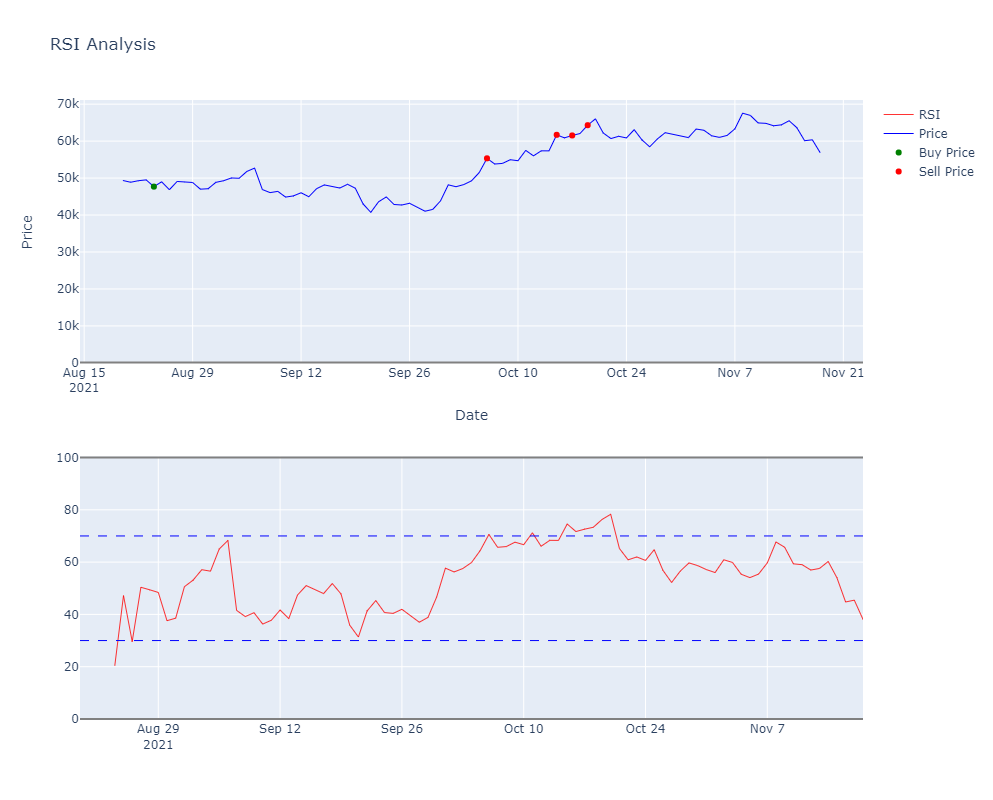

In [16]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=2, cols=1) # Creating two tables on top of eachother with shared x axis 

fig.add_trace(go.Scatter(x=rdf.index, y= rdf['rsi_14'], line=dict (color='red', width=.8), name = 'RSI', ), col=1, row=2) #creates a rsi line with a window of 14 days in red, located in the bottom graph

fig.add_trace(go.Scatter(x=rdf.index, y= rdf['close'], line=dict (color='blue', width=1), name = 'Price'), col=1, row=1) #creates a closing price line in blue , located in the top graph

#Markers will show what price to buy and sell the crypto
fig.add_trace(go.Scatter(x=rdf.index, y=rdf['buy_price'],mode='markers',marker=dict(color='Green'),name='Buy Price'), col=1, row=1) #buy marker denoted by green

fig.add_trace(go.Scatter(x=rdf.index, y=rdf['sell_price'], mode='markers',marker=dict(color='Red'), name='Sell Price'), col=1, row=1) #sell marker denoted by red 


#fig.add_trace(go.Candlestick(x=rdf.index, open= rdf['open'],high=rdf['high'], low= rdf['low'], close=rdf['close'], name = 'Price'), col=1, row=1)


fig.update_layout(title='RSI Analysis',xaxis_title='Date',yaxis_title='Price', height=800)#height allows you to change how big the graph is 


#creating parameters for how big the graph below should be  
fig.add_hline(y=0,col=1, row=2, line_color="grey", line_width=2)
fig.add_hline(y=100, line_color="grey", line_width=2)

# Upper and lower bands
fig.add_hline(y=30,col=1, row=2, line_color='blue', line_width=1, line_dash='dash') #creates a blue dotted line indicating when to sell 
fig.add_hline(y=70,col=1, row=2, line_color='blue', line_width=1, line_dash='dash') #creates a blue dotted line indicating when to buy 





fig.show()

In [17]:
  #aliceblue, antiquewhite, aqua, aquamarine, azure,
                #beige, bisque, black, blanchedalmond, blue,
                #blueviolet, brown, burlywood, cadetblue,
                #chartreuse, chocolate, coral, cornflowerblue,
                #cornsilk, crimson, cyan, darkblue, darkcyan,
                #darkgoldenrod, darkgray, darkgrey, darkgreen,
                #darkkhaki, darkmagenta, darkolivegreen, darkorange,
                #darkorchid, darkred, darksalmon, darkseagreen,
                #darkslateblue, darkslategray, darkslategrey,
                #darkturquoise, darkviolet, deeppink, deepskyblue,
                #dimgray, dimgrey, dodgerblue, firebrick,
                #floralwhite, forestgreen, fuchsia, gainsboro,
                #ghostwhite, gold, goldenrod, gray, grey, green,
                #greenyellow, honeydew, hotpink, indianred, indigo,
                #ivory, khaki, lavender, lavenderblush, lawngreen,
                #lemonchiffon, lightblue, lightcoral, lightcyan,
                #lightgoldenrodyellow, lightgray, lightgrey,
                #lightgreen, lightpink, lightsalmon, lightseagreen,
                #lightskyblue, lightslategray, lightslategrey,
                #lightsteelblue, lightyellow, lime, limegreen,
                #linen, magenta, maroon, mediumaquamarine,
                #mediumblue, mediumorchid, mediumpurple,
                #mediumseagreen, mediumslateblue, mediumspringgreen,
                #mediumturquoise, mediumvioletred, midnightblue,
                #mintcream, mistyrose, moccasin, navajowhite, navy,
                #oldlace, olive, olivedrab, orange, orangered,
               # orchid, palegoldenrod, palegreen, paleturquoise,

# Puell Multiple

In [18]:
# CALCULATE NUMBER OF BITCOIN TRADING DAYS STARTING ON 2009-1-2


#set our current date to datetime format
asset_data_pm_df['date'] = pd.to_datetime(asset_data_pm_df['date'])

#trading days becomes a column of the first trading day in the correct format to use for calculations and write overtop
asset_data_pm_df['trading_days'] = pd.to_datetime("2009-01-02T00:00:00.000Z")

# tradings days = the price's current date minus the first day of trading
asset_data_pm_df['trading_days'] = asset_data_pm_df['date'] - asset_data_pm_df['trading_days']

# convert datetime output in an integer
asset_data_pm_df['trading_days'] = pd.to_numeric(asset_data_pm_df['trading_days'].dt.days, downcast='integer')

asset_data_pm_df.head()


date  price  trading_days
0 2014-04-15 00:00:00+00:00 521.62          1929
1 2014-04-16 00:00:00+00:00 531.48          1930
2 2014-04-17 00:00:00+00:00 499.84          1931
3 2014-04-18 00:00:00+00:00 483.02          1932
4 2014-04-19 00:00:00+00:00 504.37          1933

In [19]:
# PUELL MULTIPLE CALCULATIONS

# Create a new column called "btcIssuance" and populate with data based on formula
# FORMULA EXPLAINED:
  # 7200 blocks/day = this is our starting point, the # of btc produced per day in the first era of bitcoin (pre-halving), 50 btc per block * 144 blocks per day = 7200 blocks/day
  # 2**(np.floor(df["index"]/1458) = determines which cycle of the halving we are in 
    # "2**"" means 2 to the power of....
    # np.floor = rounds down to the nearest whole number
    # index = our index column counts the days bitcoin has existed
    # 1458 = the # of days between each halving, 210,000 (# blocks before each halving) / 144 blocks per day = 1458.33    
    # (np.floor(df["index"]/1458) = which halving era we are in (ie. on day 365 we are still in the first era with 0 halvings yet, so the output would be 0)

# append bitcoin daily BTC issuance in number of coins
asset_data_pm_df["btcIssuance/day"] = 7200 / 2**(np.floor(asset_data_pm_df["trading_days"]/1458))

# append bitcoin daily issuance in us dollars
asset_data_pm_df["usdIssuance/day"] = asset_data_pm_df["btcIssuance/day"]* asset_data_pm_df["price"]

# append 365-day moving average of daily btc issuance in us dollars 
asset_data_pm_df["usdIssuance/day_MA"] = asset_data_pm_df["usdIssuance/day"].rolling(window=365).mean()

# append puell multiple calculation
asset_data_pm_df["puell_multiple"] = asset_data_pm_df["usdIssuance/day"] / asset_data_pm_df["usdIssuance/day_MA"]

asset_data_pm_df.tail()

date     price  trading_days  btcIssuance/day  \
2767 2021-11-11 00:00:00+00:00 64,962.93          4696           900.00   
2768 2021-11-12 00:00:00+00:00 64,078.97          4697           900.00   
2769 2021-11-13 00:00:00+00:00 64,397.79          4698           900.00   
2770 2021-11-14 00:00:00+00:00 65,032.23          4699           900.00   
2771 2021-11-15 00:00:00+00:00 63,753.50          4700           900.00   

      usdIssuance/day  usdIssuance/day_MA  puell_multiple  
2767    58,466,638.16       40,651,788.42            1.44  
2768    57,671,071.23       40,729,458.02            1.42  
2769    57,958,012.09       40,807,715.28            1.42  
2770    58,529,003.09       40,888,661.54            1.43  
2771    57,378,152.84       40,967,023.17            1.40

In [20]:
# BUY // SELL INDICATORS

# append upper sell limit
asset_data_pm_df["sell_limit"] = 4

# append lower buy limit
asset_data_pm_df["buy_limit"] = .5

# append buy / sell signal
asset_data_pm_df.loc[asset_data_pm_df['puell_multiple'] < .5, 'buy/sell_signal'] = 1
asset_data_pm_df.loc[asset_data_pm_df['puell_multiple'] > 4, 'buy/sell_signal'] = -1
asset_data_pm_df.loc[asset_data_pm_df['puell_multiple'].between(.5, 4) , 'buy/sell_signal'] = 0

asset_data_pm_df.head()

date  price  trading_days  btcIssuance/day  \
0 2014-04-15 00:00:00+00:00 521.62          1929         3,600.00   
1 2014-04-16 00:00:00+00:00 531.48          1930         3,600.00   
2 2014-04-17 00:00:00+00:00 499.84          1931         3,600.00   
3 2014-04-18 00:00:00+00:00 483.02          1932         3,600.00   
4 2014-04-19 00:00:00+00:00 504.37          1933         3,600.00   

   usdIssuance/day  usdIssuance/day_MA  puell_multiple  sell_limit  buy_limit  \
0     1,877,815.08                 NaN             NaN           4       0.50   
1     1,913,334.65                 NaN             NaN           4       0.50   
2     1,799,415.19                 NaN             NaN           4       0.50   
3     1,738,872.05                 NaN             NaN           4       0.50   
4     1,815,716.14                 NaN             NaN           4       0.50   

   buy/sell_signal  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN

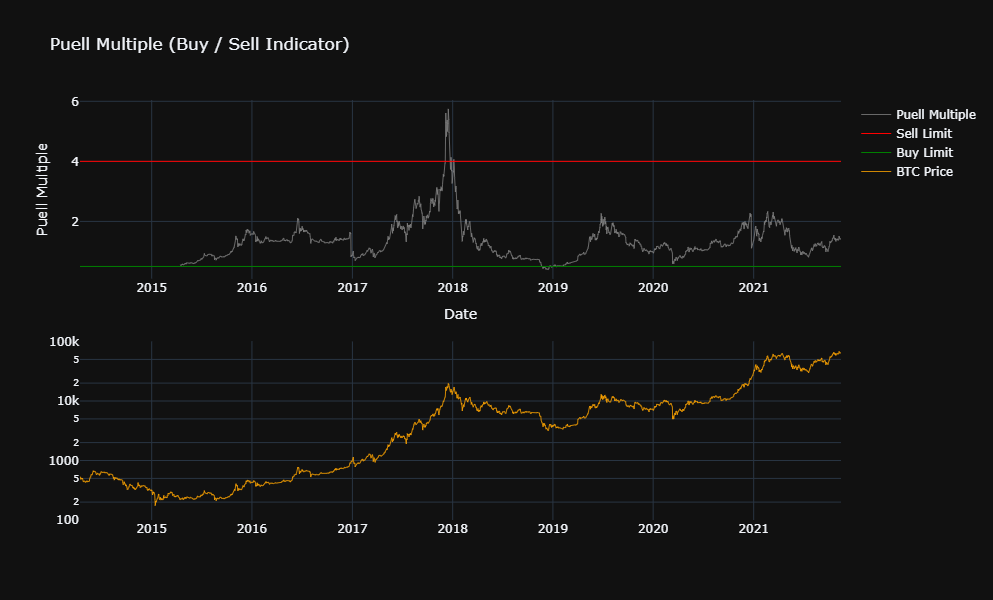

In [21]:
# PLOTTING WITH PLOTLY

# Initial a figure setup for supplots
puell_fig = make_subplots(rows=2, cols=1) # Creating two tables on top of eachother with shared x axis

# Puell Multiple items in row 1
puell_fig.add_trace(go.Scatter(x=asset_data_pm_df['date'], y= asset_data_pm_df["puell_multiple"], line=dict (color='grey', width=.8), name = 'Puell Multiple'), col=1, row=1)
puell_fig.add_trace(go.Scatter(x=asset_data_pm_df['date'], y= asset_data_pm_df["sell_limit"], line=dict (color='red', width=1), name = 'Sell Limit'), col=1, row=1)
puell_fig.add_trace(go.Scatter(x=asset_data_pm_df['date'], y= asset_data_pm_df["buy_limit"], line=dict (color='green', width=1), name = 'Buy Limit'), col=1, row=1)

# Price items in row 2
puell_fig.add_trace(go.Scatter(x=asset_data_pm_df['date'], y= asset_data_pm_df["price"], line=dict (color='orange', width=.8), name = 'BTC Price', ), col=1, row=2)

# Global parameters to the entire chart
puell_fig.update_layout(template="plotly_dark", title='Puell Multiple (Buy / Sell Indicator)',xaxis_title='Date',yaxis_title='Puell Multiple', height = 600)

# Make the second chart in log
puell_fig.update_yaxes(type="log", range=[2,5], col=1, row=2)


puell_fig.show()

# Stochastic Oscillator

In [22]:
# Create dataframe to work with
skdj_df = asset_data_df
skdj_df = skdj_df.set_index(pd.DatetimeIndex(skdj_df['date']))

# Define Periods
k_period = 14
d_period = 3

# Adds a 'n_high' column with max value of previous 14 periods
skdj_df['n_high'] = skdj_df['high'].rolling(k_period).max()

# Adds a 'n_low' column with min value of previous 14 periods
skdj_df['n_low'] = skdj_df['low'].rolling(k_period).min()

#Uses the min/max values to calculate the %k (as a percentage)
skdj_df['%k'] = (skdj_df['close'] - skdj_df['n_low']) * 100 / (skdj_df['n_high'] - skdj_df['n_low'])

# Uses the %k to calculate a SMA over the past 3 values of %k
skdj_df['%d'] = skdj_df['%k'].rolling(d_period).mean()

skdj_df.head(20)

date      open     close  \
date                                                                            
2021-08-20 00:00:00+00:00  2021-08-20T00:00:00.000000000Z 46,769.02 49,342.40   
2021-08-21 00:00:00+00:00  2021-08-21T00:00:00.000000000Z 49,349.99 48,867.02   
2021-08-22 00:00:00+00:00  2021-08-22T00:00:00.000000000Z 48,870.21 49,284.63   
2021-08-23 00:00:00+00:00  2021-08-23T00:00:00.000000000Z 49,284.38 49,506.50   
2021-08-24 00:00:00+00:00  2021-08-24T00:00:00.000000000Z 49,504.53 47,682.45   
2021-08-25 00:00:00+00:00  2021-08-25T00:00:00.000000000Z 47,682.45 48,987.33   
2021-08-26 00:00:00+00:00  2021-08-26T00:00:00.000000000Z 48,991.57 46,851.47   
2021-08-27 00:00:00+00:00  2021-08-27T00:00:00.000000000Z 46,851.47 49,077.57   
2021-08-28 00:00:00+00:00  2021-08-28T00:00:00.000000000Z 49,081.08 48,942.94   
2021-08-29 00:00:00+00:00  2021-08-29T00:00:00.000000000Z 48,942.89 48,802.58   
2021-08-30 00:00:00+00:00  2021-08-30T00:00:00.000000000Z 48,802.58 46,993.71   
2021-08-31 00:00:00+00:00  2021-08-31T00:00:00.000000000Z 46,996.80 47,112.50   
2021-09-01 00:00:00+00:00  2021-09-01T00:00:00.000000000Z 47,110.33 48,839.86   
2021-09-02 00:00:00+00:00  2021-09-02T00:00:00.000000000Z 48,834.27 49,279.37   
2021-09-03 00:00:00+00:00  2021-09-03T00:00:00.000000000Z 49,279.38 50,025.00   
2021-09-04 00:00:00+00:00  2021-09-04T00:00:00.000000000Z 50,025.00 49,942.98   
2021-09-05 00:00:00+00:00  2021-09-05T00:00:00.000000000Z 49,944.89 51,789.17   
2021-09-06 00:00:00+00:00  2021-09-06T00:00:00.000000000Z 51,789.17 52,698.81   
2021-09-07 00:00:00+00:00  2021-09-07T00:00:00.000000000Z 52,698.80 46,894.50   
2021-09-08 00:00:00+00:00  2021-09-08T00:00:00.000000000Z 46,880.15 46,060.36   

                               high       low    volume      vwap       sma  \
date                                                                          
2021-08-20 00:00:00+00:00 49,400.00 46,644.95 13,184.67 48,000.67       NaN   
2021-08-21 00:00:00+00:00 49,821.92 48,285.28  9,574.84 49,058.09       NaN   
2021-08-22 00:00:00+00:00 49,526.13 48,102.89  6,243.40 48,847.07       NaN   
2021-08-23 00:00:00+00:00 50,505.00 49,012.84 10,824.27 49,881.69       NaN   
2021-08-24 00:00:00+00:00 49,875.90 47,600.00 12,068.34 48,642.69       NaN   
2021-08-25 00:00:00+00:00 49,277.00 47,122.02  9,289.23 48,212.27       NaN   
2021-08-26 00:00:00+00:00 49,365.10 46,315.48 11,651.32 47,253.25       NaN   
2021-08-27 00:00:00+00:00 49,185.12 46,361.01  8,924.12 47,765.93       NaN   
2021-08-28 00:00:00+00:00 49,309.83 48,370.00  4,895.70 48,889.40       NaN   
2021-08-29 00:00:00+00:00 49,667.10 47,801.00  6,935.10 48,729.18       NaN   
2021-08-30 00:00:00+00:00 48,906.51 46,866.00 12,249.24 48,006.58       NaN   
2021-08-31 00:00:00+00:00 48,259.68 46,708.93 12,919.44 47,346.39       NaN   
2021-09-01 00:00:00+00:00 49,125.00 46,537.62 13,010.84 47,817.45       NaN   
2021-09-02 00:00:00+00:00 50,392.19 48,620.73 14,120.38 49,684.35       NaN   
2021-09-03 00:00:00+00:00 51,064.44 48,349.66 14,577.23 50,032.04       NaN   
2021-09-04 00:00:00+00:00 50,558.75 49,400.00  7,595.49 50,014.31       NaN   
2021-09-05 00:00:00+00:00 51,907.08 49,500.00  7,743.93 50,658.49       NaN   
2021-09-06 00:00:00+00:00 52,802.03 51,020.08  9,571.75 51,859.41       NaN   
2021-09-07 00:00:00+00:00 52,944.96 42,830.77 29,022.82 48,527.93       NaN   
2021-09-08 00:00:00+00:00 47,381.47 44,423.49 19,624.55 46,200.97 48,849.06   

                           upper_band  lower_band    n_high     n_low    %k  \
date                                                                          
2021-08-20 00:00:00+00:00         NaN         NaN       NaN       NaN   NaN   
2021-08-21 00:00:00+00:00         NaN         NaN       NaN       NaN   NaN   
2021-08-22 00:00:00+00:00         NaN         NaN       NaN       NaN   NaN   
2021-08-23 00:00:00+00:00         NaN         NaN       NaN       NaN   NaN   
2021-08-24 00:00:00+00:00         NaN         NaN       N

In [23]:
#BUY // SELL INDICATORS

# append upper sell limit
skdj_df["sell_limit"] = 80

# append lower buy limit
skdj_df["buy_limit"] = 20

# append buy / sell signal
skdj_df.loc[skdj_df['%k'] < 20, 'skdj_signal'] = 1
skdj_df.loc[skdj_df['%k'] > 80, 'skdj_signal'] = -1
skdj_df.loc[skdj_df['%k'].between(20, 80) , 'skdj_signal'] = 0

skdj_df.head(60)

date      open     close  \
date                                                                            
2021-08-20 00:00:00+00:00  2021-08-20T00:00:00.000000000Z 46,769.02 49,342.40   
2021-08-21 00:00:00+00:00  2021-08-21T00:00:00.000000000Z 49,349.99 48,867.02   
2021-08-22 00:00:00+00:00  2021-08-22T00:00:00.000000000Z 48,870.21 49,284.63   
2021-08-23 00:00:00+00:00  2021-08-23T00:00:00.000000000Z 49,284.38 49,506.50   
2021-08-24 00:00:00+00:00  2021-08-24T00:00:00.000000000Z 49,504.53 47,682.45   
2021-08-25 00:00:00+00:00  2021-08-25T00:00:00.000000000Z 47,682.45 48,987.33   
2021-08-26 00:00:00+00:00  2021-08-26T00:00:00.000000000Z 48,991.57 46,851.47   
2021-08-27 00:00:00+00:00  2021-08-27T00:00:00.000000000Z 46,851.47 49,077.57   
2021-08-28 00:00:00+00:00  2021-08-28T00:00:00.000000000Z 49,081.08 48,942.94   
2021-08-29 00:00:00+00:00  2021-08-29T00:00:00.000000000Z 48,942.89 48,802.58   
2021-08-30 00:00:00+00:00  2021-08-30T00:00:00.000000000Z 48,802.58 46,993.71   
2021-08-31 00:00:00+00:00  2021-08-31T00:00:00.000000000Z 46,996.80 47,112.50   
2021-09-01 00:00:00+00:00  2021-09-01T00:00:00.000000000Z 47,110.33 48,839.86   
2021-09-02 00:00:00+00:00  2021-09-02T00:00:00.000000000Z 48,834.27 49,279.37   
2021-09-03 00:00:00+00:00  2021-09-03T00:00:00.000000000Z 49,279.38 50,025.00   
2021-09-04 00:00:00+00:00  2021-09-04T00:00:00.000000000Z 50,025.00 49,942.98   
2021-09-05 00:00:00+00:00  2021-09-05T00:00:00.000000000Z 49,944.89 51,789.17   
2021-09-06 00:00:00+00:00  2021-09-06T00:00:00.000000000Z 51,789.17 52,698.81   
2021-09-07 00:00:00+00:00  2021-09-07T00:00:00.000000000Z 52,698.80 46,894.50   
2021-09-08 00:00:00+00:00  2021-09-08T00:00:00.000000000Z 46,880.15 46,060.36   
2021-09-09 00:00:00+00:00  2021-09-09T00:00:00.000000000Z 46,059.94 46,400.00   
2021-09-10 00:00:00+00:00  2021-09-10T00:00:00.000000000Z 46,394.38 44,851.45   
2021-09-11 00:00:00+00:00  2021-09-11T00:00:00.000000000Z 44,850.37 45,171.83   
2021-09-12 00:00:00+00:00  2021-09-12T00:00:00.000000000Z 45,173.66 46,024.23   
2021-09-13 00:00:00+00:00  2021-09-13T00:00:00.000000000Z 46,027.80 44,947.72   
2021-09-14 00:00:00+00:00  2021-09-14T00:00:00.000000000Z 44,953.23 47,127.22   
2021-09-15 00:00:00+00:00  2021-09-15T00:00:00.000000000Z 47,127.81 48,148.12   
2021-09-16 00:00:00+00:00  2021-09-16T00:00:00.000000000Z 48,144.03 47,753.16   
2021-09-17 00:00:00+00:00  2021-09-17T00:00:00.000000000Z 47,753.15 47,303.50   
2021-09-18 00:00:00+00:00  2021-09-18T00:00:00.000000000Z 47,306.87 48,314.56   
2021-09-19 00:00:00+00:00  2021-09-19T00:00:00.000000000Z 48,309.04 47,255.92   
2021-09-20 00:00:00+00:00  2021-09-20T00:00:00.000000000Z 47,253.71 43,012.97   
2021-09-21 00:00:00+00:00  2021-09-21T00:00:00.000000000Z 43,007.69 40,719.60   
2021-09-22 00:00:00+00:00  2021-09-22T00:00:00.000000000Z 40,736.81 43,575.10   
2021-09-23 00:00:00+00:00  2021-09-23T00:00:00.000000000Z 43,575.19 44,897.59   
2021-09-24 00:00:00+00:00  2021-09-24T00:00:00.000000000Z 44,896.55 42,848.92   
2021-09-25 00:00:00+00:00  2021-09-25T00:00:00.000000000Z 42,848.44 42,705.51   
2021-09-26 00:00:00+00:00  2021-09-26T00:00:00.000000000Z 42,704.71 43,178.02   
2021-09-27 00:00:00+00:00  2021-09-27T00:00:00.000000000Z 43,172.16 42,171.76   
2021-09-28 00:00:00+00:00  2021-09-28T00:00:00.000000000Z 42,166.31 41,026.07   
2021-09-29 00:00:00+00:00  2021-09-29T00:00:00.000000000Z 41,030.19 41,522.16   
2021-09-30 00:00:00+00:00  2021-09-30T00:00:00.000000000Z 41,519.11 43,824.43   
2021-10-01 00:00:00+00:00  2021-10-01T00:00:00.000000000Z 43,828.89 48,165.76   
2021-10-02 00:00:00+00:00  2021-10-02T00:00:00.000000000Z 48,165.76 47,657.69   
2021-10-03 00:00:00+00:00  2021-10-03T00:00:00.000000000Z 47,663.74 48,233.99   
2021-10-04 00:00:00+00:00  2021-10-04T00:00:00.000000000Z 48,233.99 49,245.54   
2021-10-05 00:00:00+00:00  2021-10-05T00:00:00.000000000Z 49,244.13 51,493.99   
2021-10-06 00:00:00+00:00  2021-10-06T00:00:00.000000000Z 51,499.77 55,339.48   
202

In [24]:
# Create primary chart
fig_skdj = make_subplots(rows=2, cols=1)

# Create Candlestick chart with an overlaid price line
fig_skdj.append_trace(
    go.Candlestick(
        x=skdj_df.index,
        open = skdj_df['open'],
        high = skdj_df['high'],
        low = skdj_df['low'],
        close = skdj_df['close'],
        increasing_line_color = '#ff9900',
        decreasing_line_color = 'black',
        showlegend = False
    ), row=1, col=1 
)

# price Line
fig_skdj.append_trace(
    go.Scatter(
        x = skdj_df.index,
        y = skdj_df['open'],
        line = dict(color='#ff9900', width=1),
        name = 'open',
    ), row=1, col=1
)

# Fast Signal (%k)
fig_skdj.append_trace(
    go.Scatter(
        x = skdj_df.index,
        y = skdj_df['%k'],
        line = dict(color='#ff9900', width=2),
        name = 'fast',
    ), row=2, col=1
)

# Slow Signal (%d)
fig_skdj.append_trace(
    go.Scatter(
        x = skdj_df.index,
        y = skdj_df['%d'],
        line = dict(color='#000000', width=2),
        name = 'slow'
    ), row=2, col=1
)

# Extend our y-axis
fig_skdj.update_yaxes(range=[-10, 200], row=2, col=1)

# Add upper/lower bounds
fig_skdj.add_hline(y=0, col=1, row=2, line_color="#666", line_width=2)
fig_skdj.add_hline(y=100, col=1, row=2, line_color="#666", line_width=2)

# Add overbought/oversold
fig_skdj.add_hline(y=20, col=1, row=2, line_color='#336699', line_width=2, line_dash='dash')
fig_skdj.add_hline(y=80, col=1, row=2, line_color='#336699', line_width=2, line_dash='dash')

# Make it pretty
layout = go.Layout(
    plot_bgcolor='#efefef',
    # Font Families
    font_family='sans serif',
    font_color='#000000',
    font_size=15,
    title = 'Stochastic Oscillator',
    height = 800,
    xaxis=dict(
        rangeslider=dict(
            visible=False
        )
    )
)
fig_skdj.update_layout(layout)

fig_skdj.show()

In [25]:
# # DATAFRAME FOR BUY SELL CHART (90 DAY)

# pm_buy_sell_dict = {
#     "date" : [],
#     "price" : [],
#     "puell_multiple" : [],
#     "sell_limit" : [],
#     "buy_limit" : [],
# }

# for row in asset_data_pm_df['date']: #needs to start at begin_timestamp
#     pm_buy_sell_dict['date'].append(asset_data_pm_df["date"])
#     pm_buy_sell_dict['price'].append(asset_data_pm_df["price"])
#     pm_buy_sell_dict['puell_multiple'].append(asset_data_pm_df["puell_multiple"])
#     pm_buy_sell_dict['sell_limit'].append(asset_data_pm_df["sell_limit"])
#     pm_buy_sell_dict['buy_limit'].append(asset_data_pm_df["buy_limit"])
#     if asset_data_pm_df['date'] = end_timestamp  #needs to start at begin_timestamp
#         break
        
#         # if date is < end and > begin, append
        
# pm_buy_sell_df = pd.DataFrame.from_dict(pm_buy_sell_dict)
# pd.options.display.float_format = "{:,.2f}".format

# pm_buy_sell_df.tail()

In [26]:
# set index to be date

# pm_buy_sell_df = 

asset_data_pm_df.loc[begin_timestamp: end_timestamp,:]



date    price  trading_days  btcIssuance/day  \
2015 2019-10-21 00:00:00+00:00 8,211.65          3944         1,800.00   
2016 2019-10-22 00:00:00+00:00 8,029.21          3945         1,800.00   
2017 2019-10-23 00:00:00+00:00 7,458.04          3946         1,800.00   
2018 2019-10-24 00:00:00+00:00 7,454.37          3947         1,800.00   
2019 2019-10-25 00:00:00+00:00 8,656.66          3948         1,800.00   
2020 2019-10-26 00:00:00+00:00 9,249.65          3949         1,800.00   
2021 2019-10-27 00:00:00+00:00 9,558.16          3950         1,800.00   

      usdIssuance/day  usdIssuance/day_MA  puell_multiple  sell_limit  \
2015    14,780,978.21       12,149,639.66            1.22           4   
2016    14,452,569.67       12,157,634.48            1.19           4   
2017    13,424,464.54       12,162,871.98            1.10           4   
2018    13,417,868.05       12,168,003.54            1.10           4   
2019    15,581,979.32       12,179,120.79            1.28           4   
2020    16,649,364.17       12,193,153.58            1.37           4   
2021    17,204,680.88       12,208,681.66            1.41           4   

      buy_limit  buy/sell_signal  
2015       0.50             0.00  
2016       0.50             0.00  
2017       0.50             0.00  
2018       0.50             0.00  
2019       0.50             0.00  
2020       0.50             0.00  
2021       0.50             0.00

## VWAP

In [27]:
# Volume Weighted Average Price: Ratio of total value traded diveded by the total volume traded
# Create dataframe to work with
vwap_df = asset_data_df
vwap_df = vwap_df.set_index(pd.DatetimeIndex(vwap_df['date']))

In [28]:
#Calculate simple moving average 
def vwapma(data, window):
    return(data.rolling(window = window).mean()) #finding the 10 day simple moving average 
vwapma(vwap_df['vwap'], window = 10)

vwap_df['vwap_ma'] = vwapma(vwap_df['vwap'],10)
vwap_df.tail()

date      open     close  \
date                                                                            
2021-11-14 00:00:00+00:00  2021-11-14T00:00:00.000000000Z 64,400.01 65,505.02   
2021-11-15 00:00:00+00:00  2021-11-15T00:00:00.000000000Z 65,505.03 63,624.59   
2021-11-16 00:00:00+00:00  2021-11-16T00:00:00.000000000Z 63,621.05 60,107.98   
2021-11-17 00:00:00+00:00  2021-11-17T00:00:00.000000000Z 60,088.65 60,351.51   
2021-11-18 00:00:00+00:00  2021-11-18T00:00:00.000000000Z 60,351.51 56,898.00   

                               high       low    volume      vwap       sma  \
date                                                                          
2021-11-14 00:00:00+00:00 65,525.00 63,596.90  6,081.57 64,515.20 62,881.02   
2021-11-15 00:00:00+00:00 66,339.90 63,371.00 10,426.56 64,753.40 63,045.37   
2021-11-16 00:00:00+00:00 63,624.60 58,638.00 24,910.15 60,821.42 63,128.00   
2021-11-17 00:00:00+00:00 60,824.38 58,380.00 20,907.45 59,824.24 63,115.99   
2021-11-18 00:00:00+00:00 60,977.21 56,514.13 26,749.21 58,560.83 62,847.06   

                           upper_band  lower_band   vwap_ma  
date                                                         
2021-11-14 00:00:00+00:00   67,547.58   58,214.47 64,190.50  
2021-11-15 00:00:00+00:00   67,563.95   58,526.80 64,527.09  
2021-11-16 00:00:00+00:00   67,343.45   58,912.55 64,518.08  
2021-11-17 00:00:00+00:00   67,363.11   58,868.87 64,275.51  
2021-11-18 00:00:00+00:00   67,919.02   57,775.09 63,562.83

In [29]:
#Calculate the upper and lower bands 
def vwap(data, vwap_ma, window):
    
    std_vwap = data.rolling(window=window).std() #finding how far the standard deviation is away from the mean 
    
# bollinger bands = simple moving average +- two standard deviations away

    upper_band = vwap_ma + std_vwap * 2 #creating the top band
    lower_band = vwap_ma - std_vwap * 2 #creating the lower band
    return upper_band, lower_band
vwap_df['upper_band'],vwap_df['lower_band'] = vwap(vwap_df['vwap'], vwap_df['vwap_ma'],10)
vwap_df.tail()

date      open     close  \
date                                                                            
2021-11-14 00:00:00+00:00  2021-11-14T00:00:00.000000000Z 64,400.01 65,505.02   
2021-11-15 00:00:00+00:00  2021-11-15T00:00:00.000000000Z 65,505.03 63,624.59   
2021-11-16 00:00:00+00:00  2021-11-16T00:00:00.000000000Z 63,621.05 60,107.98   
2021-11-17 00:00:00+00:00  2021-11-17T00:00:00.000000000Z 60,088.65 60,351.51   
2021-11-18 00:00:00+00:00  2021-11-18T00:00:00.000000000Z 60,351.51 56,898.00   

                               high       low    volume      vwap       sma  \
date                                                                          
2021-11-14 00:00:00+00:00 65,525.00 63,596.90  6,081.57 64,515.20 62,881.02   
2021-11-15 00:00:00+00:00 66,339.90 63,371.00 10,426.56 64,753.40 63,045.37   
2021-11-16 00:00:00+00:00 63,624.60 58,638.00 24,910.15 60,821.42 63,128.00   
2021-11-17 00:00:00+00:00 60,824.38 58,380.00 20,907.45 59,824.24 63,115.99   
2021-11-18 00:00:00+00:00 60,977.21 56,514.13 26,749.21 58,560.83 62,847.06   

                           upper_band  lower_band   vwap_ma  
date                                                         
2021-11-14 00:00:00+00:00   68,546.20   59,834.80 64,190.50  
2021-11-15 00:00:00+00:00   68,415.22   60,638.95 64,527.09  
2021-11-16 00:00:00+00:00   68,443.69   60,592.46 64,518.08  
2021-11-17 00:00:00+00:00   69,035.18   59,515.85 64,275.51  
2021-11-18 00:00:00+00:00   69,395.94   57,729.72 63,562.83

In [30]:
## Buy/ Sell Indicator

# append upper sell limit
vwap_df["sell_limit"] = vwap_df['upper_band']

# append lower buy limit
vwap_df["buy_limit"] = vwap_df['lower_band']

# append buy / sell signal
vwap_df.loc[vwap_df['close'] < vwap_df['lower_band'], 'vwap_signal'] = 1
vwap_df.loc[vwap_df['close'] > vwap_df['upper_band'], 'vwap_signal'] = -1
vwap_df.loc[vwap_df['close'].between(vwap_df['lower_band'], vwap_df['upper_band']) , 'vwap_signal'] = 0

vwap_df.head(20)

date      open     close  \
date                                                                            
2021-08-20 00:00:00+00:00  2021-08-20T00:00:00.000000000Z 46,769.02 49,342.40   
2021-08-21 00:00:00+00:00  2021-08-21T00:00:00.000000000Z 49,349.99 48,867.02   
2021-08-22 00:00:00+00:00  2021-08-22T00:00:00.000000000Z 48,870.21 49,284.63   
2021-08-23 00:00:00+00:00  2021-08-23T00:00:00.000000000Z 49,284.38 49,506.50   
2021-08-24 00:00:00+00:00  2021-08-24T00:00:00.000000000Z 49,504.53 47,682.45   
2021-08-25 00:00:00+00:00  2021-08-25T00:00:00.000000000Z 47,682.45 48,987.33   
2021-08-26 00:00:00+00:00  2021-08-26T00:00:00.000000000Z 48,991.57 46,851.47   
2021-08-27 00:00:00+00:00  2021-08-27T00:00:00.000000000Z 46,851.47 49,077.57   
2021-08-28 00:00:00+00:00  2021-08-28T00:00:00.000000000Z 49,081.08 48,942.94   
2021-08-29 00:00:00+00:00  2021-08-29T00:00:00.000000000Z 48,942.89 48,802.58   
2021-08-30 00:00:00+00:00  2021-08-30T00:00:00.000000000Z 48,802.58 46,993.71   
2021-08-31 00:00:00+00:00  2021-08-31T00:00:00.000000000Z 46,996.80 47,112.50   
2021-09-01 00:00:00+00:00  2021-09-01T00:00:00.000000000Z 47,110.33 48,839.86   
2021-09-02 00:00:00+00:00  2021-09-02T00:00:00.000000000Z 48,834.27 49,279.37   
2021-09-03 00:00:00+00:00  2021-09-03T00:00:00.000000000Z 49,279.38 50,025.00   
2021-09-04 00:00:00+00:00  2021-09-04T00:00:00.000000000Z 50,025.00 49,942.98   
2021-09-05 00:00:00+00:00  2021-09-05T00:00:00.000000000Z 49,944.89 51,789.17   
2021-09-06 00:00:00+00:00  2021-09-06T00:00:00.000000000Z 51,789.17 52,698.81   
2021-09-07 00:00:00+00:00  2021-09-07T00:00:00.000000000Z 52,698.80 46,894.50   
2021-09-08 00:00:00+00:00  2021-09-08T00:00:00.000000000Z 46,880.15 46,060.36   

                               high       low    volume      vwap       sma  \
date                                                                          
2021-08-20 00:00:00+00:00 49,400.00 46,644.95 13,184.67 48,000.67       NaN   
2021-08-21 00:00:00+00:00 49,821.92 48,285.28  9,574.84 49,058.09       NaN   
2021-08-22 00:00:00+00:00 49,526.13 48,102.89  6,243.40 48,847.07       NaN   
2021-08-23 00:00:00+00:00 50,505.00 49,012.84 10,824.27 49,881.69       NaN   
2021-08-24 00:00:00+00:00 49,875.90 47,600.00 12,068.34 48,642.69       NaN   
2021-08-25 00:00:00+00:00 49,277.00 47,122.02  9,289.23 48,212.27       NaN   
2021-08-26 00:00:00+00:00 49,365.10 46,315.48 11,651.32 47,253.25       NaN   
2021-08-27 00:00:00+00:00 49,185.12 46,361.01  8,924.12 47,765.93       NaN   
2021-08-28 00:00:00+00:00 49,309.83 48,370.00  4,895.70 48,889.40       NaN   
2021-08-29 00:00:00+00:00 49,667.10 47,801.00  6,935.10 48,729.18       NaN   
2021-08-30 00:00:00+00:00 48,906.51 46,866.00 12,249.24 48,006.58       NaN   
2021-08-31 00:00:00+00:00 48,259.68 46,708.93 12,919.44 47,346.39       NaN   
2021-09-01 00:00:00+00:00 49,125.00 46,537.62 13,010.84 47,817.45       NaN   
2021-09-02 00:00:00+00:00 50,392.19 48,620.73 14,120.38 49,684.35       NaN   
2021-09-03 00:00:00+00:00 51,064.44 48,349.66 14,577.23 50,032.04       NaN   
2021-09-04 00:00:00+00:00 50,558.75 49,400.00  7,595.49 50,014.31       NaN   
2021-09-05 00:00:00+00:00 51,907.08 49,500.00  7,743.93 50,658.49       NaN   
2021-09-06 00:00:00+00:00 52,802.03 51,020.08  9,571.75 51,859.41       NaN   
2021-09-07 00:00:00+00:00 52,944.96 42,830.77 29,022.82 48,527.93       NaN   
2021-09-08 00:00:00+00:00 47,381.47 44,423.49 19,624.55 46,200.97 48,849.06   

                           upper_band  lower_band   vwap_ma  sell_limit  \
date                                                                      
2021-08-20 00:00:00+00:00         NaN         NaN       NaN         NaN   
2021-08-21 00:00:00+00:00         NaN         NaN       NaN         NaN   
2021-08-22 00:00:00+00:00         NaN         NaN       NaN         NaN   
2021-08-23 00:00:00+00:00         NaN         NaN       NaN         NaN   
2021-08-24 00:00:00+00:00         NaN         NaN       NaN         NaN   
2021-0

In [31]:
# LINE Graph

fig_vwap = make_subplots(rows=1, cols=1)

# Plotting Closing price line
fig_vwap.add_trace(go.Scatter(
    x = vwap_df.index, 
    y = vwap_df["close"], 
    line = dict(color='red', width=2), 
    name = 'Price'), col=1, row=1)

# Plotting VWAP MA line
fig_vwap.add_trace(go.Scatter(
    x = vwap_df.index,
    y = vwap_df['vwap_ma'],
    mode = 'lines',
    name = 'vwap_ma', 
    line = dict(color='grey',width=2)
))

# # Add Bands
# fig_vwap.add_trace(go.Scatter(
#     x = vwap_df.index,
#     y = vwap_df['upper_band'],
#     line = dict('blue', width=2, dash='dot'),
#     name = 'Upper Band'))

fig_vwap.add_trace(go.Scatter(x=vwap_df.index, y= vwap_df['upper_band'], line=dict (color='blue', width=1, dash='dot'), name = 'Upper Band'))
fig_vwap.add_trace(go.Scatter(x=vwap_df.index, y= vwap_df['lower_band'], line=dict (color='blue', width=1, dash='dot'), name = 'Lower Band'))
                   
# fig_vwap.add_hline(y="upper_band", col=1, row=1, line_color='#336699', line_width=2, line_dash='dash')
# fig_vwap.add_hline(y=80, col=1, row=1, line_color='#336699', line_width=2, line_dash='dash')

fig_vwap.update_layout(
    height=600,
    title = 'V Wap'
)
fig_vwap.show()

# Buy / Sell Score

In [32]:
#before you add youll need to make sure you are not dropping any nulls so that columns line up ***so make sure drop.na*** is markeddown  
#Brian you will want yours to only return the last 90 rows in your dataframe since you are working with a different api

Buy_Sell_Score = []

for i in range(len(rdf['close'])):
    Buy_Sell_Score.append(rdf['rsi_signal'][i] + bb_df['bb_signal'][i] + skdj_df['skdj_signal'][i] + vwap_df['vwap_signal'][i]) #Once you create your signals of 1 0 -1 you can add your column from to this list "  + your dataframe [ column name][i]  "

asset_data_df["Buy_Sell_Score"] = Buy_Sell_Score
#asset_data_df["BB_Signal"] = bb_df['bb_signal']
#asset_data_df["RSI_Signal"] = rdf['rsi_signal']
#Buy_Sell_Score_df = pd.DataFrame(Buy_Sell_Score, columns =['Buy_Sell_Score'])

asset_data_df.tail()



date      open     close      high       low  \
86  2021-11-14T00:00:00.000000000Z 64,400.01 65,505.02 65,525.00 63,596.90   
87  2021-11-15T00:00:00.000000000Z 65,505.03 63,624.59 66,339.90 63,371.00   
88  2021-11-16T00:00:00.000000000Z 63,621.05 60,107.98 63,624.60 58,638.00   
89  2021-11-17T00:00:00.000000000Z 60,088.65 60,351.51 60,824.38 58,380.00   
90  2021-11-18T00:00:00.000000000Z 60,351.51 56,898.00 60,977.21 56,514.13   

      volume      vwap       sma  upper_band  lower_band  Buy_Sell_Score  
86  6,081.57 64,515.20 62,881.02   67,547.58   58,214.47            0.00  
87 10,426.56 64,753.40 63,045.37   67,563.95   58,526.80            0.00  
88 24,910.15 60,821.42 63,128.00   67,343.45   58,912.55            2.00  
89 20,907.45 59,824.24 63,115.99   67,363.11   58,868.87            1.00  
90 26,749.21 58,560.83 62,847.06   67,919.02   57,775.09            3.00

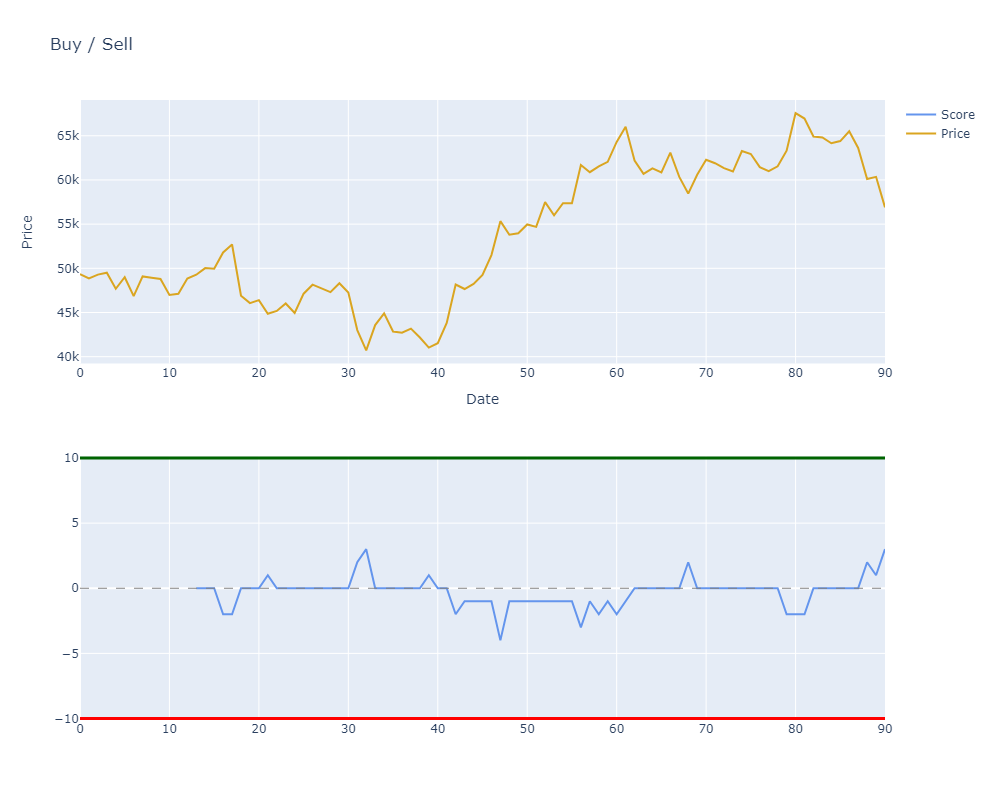

In [33]:
from plotly.subplots import make_subplots
figs = make_subplots(rows=2, cols=1) 

figs.add_trace(go.Scatter(x=asset_data_df.index, y= asset_data_df['Buy_Sell_Score'], line=dict (color='cornflowerblue', width=2), name = 'Score', ), col=1, row=2)

figs.add_trace(go.Scatter(x=asset_data_df.index, y= asset_data_df['close'], line=dict (color='goldenrod', width=2), name = 'Price'), col=1, row=1) 

figs.update_layout(title='Buy / Sell',xaxis_title='Date',yaxis_title='Price', height=800)

figs.add_hline(y=-10,col=1, row=2, line_color='red', line_width=3)  
figs.add_hline(y= 10 ,col=1, row=2, line_color='darkgreen', line_width=3) 
figs.add_hline(y= 0 ,col=1, row=2, line_color='grey', line_width=1, line_dash='dash') 

figs.show()